# Movie Recommender System

![image](../webapp/static/img/cover.jpeg)

Table of contents
===============
- [Business Understanding](#Business-Understanding:)
- [Data Understanding](#Data-Understanding:)
- [Data Preprocessing](#Data-Cleaning:)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Generating a Recommendation System](#Generating-the-Recommender-System)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation:)

## Overview


**Project Objective:**
The objective of this project is to develop a movie recommendation system that tailors suggestions to individual users, taking into account their past viewing habits and preferences. The system utilizes a combination of collaborative and content-based filtering methods to improve the precision and pertinence of the movie recommendations.

**Key Components:**

The user's selected code describes the initial steps in a data analysis process for a movie recommendation system. Here's how you might implement these steps in Python:

1. **Data Collection:**
   - Load the dataset: You can use pandas' `read_csv` function to load the dataset. The dataset is assumed to be in CSV format and contains columns for movies, genres, user ratings, and tags.
   - Clean the dataset: This could involve a variety of steps, including removing duplicates, handling missing values, and converting data types. The exact steps will depend on what the data looks like.

2. **Exploratory Data Analysis (EDA):**
   - Analyze the dataset: Use functions like `describe()`, `info()`, and `value_counts()` to understand the structure, features, and distributions of the data.
   - Visualize key patterns: You can use libraries like matplotlib and seaborn to create visualizations that help you understand user preferences and movie popularity.

3. **Content-Based Filtering:**
   - Implement a content-based recommender system: This involves creating a matrix of item features (in this case, movie genres), and then calculating the similarity between items based on these features.
   - Use TF-IDF vectors to represent movie content: The `TfidfVectorizer` class from the sklearn.feature_extraction.text module can be used to convert the genre data into a matrix of TF-IDF features. Then, you can use cosine similarity to calculate the similarity between different movies.




The selected code describes the implementation of three different types of recommendation systems:

1. **Neighborhood-Based Collaborative Filtering (KNN):** This approach uses the K-Nearest Neighbors algorithm from the SciKit Learn library. It explores both user-based and item-based collaborative filtering approaches. The performance of the model is evaluated using metrics such as Root Mean Square Error (RMSE) and Mean Absolute Error (MAE).

2. **Model-Based Collaborative Filtering (SVD):** This approach uses the Singular Value Decomposition (SVD) algorithm from the Surprise library. The performance of the model is evaluated and hyperparameters are tuned for optimal results.

3. **Hybrid Approach:** This approach combines the strengths of content-based and collaborative filtering approaches. It leverages both user-item interactions and content features to provide recommendations.

Recap:
```python
from sklearn.neighbors import NearestNeighbors
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
#KNN Model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(data)
# SVD Model
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25)

svd = SVD()
svd.fit(trainset)
predictions = svd.test(testset)
# Measure
accuracy.rmse(predictions)
```



Business Understanding:
=======

Objective:
-------------
The main goal of this project is to boost user engagement and satisfaction on the MovieLens platform by providing personalized and relevant movie recommendations. The recommender system is designed to offer customized suggestions to users based on their historical movie ratings and tagging activities, thereby enhancing their overall user experience.

Scope:
-------------
The project will concentrate on the development of a recommender system based on collaborative filtering, utilizing the ml-latest-small dataset from MovieLens. The recommendations will be user-centric, ensuring that users discover movies that align with their tastes and interests. The project scope encompasses both explicit ratings and user-generated tags as significant indicators of user preferences.

Success Criteria:
-------------
The effectiveness of the recommender system will be assessed based on several key performance indicators (KPIs):
-  User Engagement:
An increase in the number of user interactions with the platform, including ratings, tags, and time spent on the website. 
- Recommendation Accuracy:
Enhancement in the precision and relevance of movie recommendations, reducing instances of irrelevant or disliked suggestions.
- User Satisfaction:
Positive user feedback, gauged through surveys, reviews, and user ratings.
 -  Platform Adoption:
Increase in the number of registered users and active users utilizing the recommendation features.

The section describes the structure and content of the MovieLens dataset used in the project. This dataset is composed of four separate files:

1. **Movies Data (`movies.csv`):** This file contains information about each movie, including its unique identifier (`movieId`), title (`title`), and genres (`genres`). The genres are represented as a pipe-separated list.

2. **Links Data (`links.csv`):** This file provides identifiers for linking each movie to external movie-related sources, IMDb and TMDb. It includes the unique identifier for each movie (`movieId`), the identifier for movies used by IMDb (`imdbId`), and the identifier for movies used by TMDb (`tmdbId`).

3. **Ratings Data (`ratings.csv`):** This file contains user ratings for each movie. Each entry represents a user's rating for a specific movie, including the unique identifier for each user (`userId`), the unique identifier for each movie (`movieId`), the user's rating for the movie on a 5-star scale with half-star increments (`rating`), and the timestamp when the rating was recorded (`timestamp`).

4. **Tags Data (`tags.csv`):** This file contains user-generated metadata (tags) about movies. It includes the unique identifier for each user (`userId`), the unique identifier for each movie (`movieId`), the user-generated metadata describing a movie (`tag`), and the timestamp when the tag was applied (`timestamp`).

This dataset is used to develop a movie recommendation system. The system utilizes a combination of collaborative and content-based filtering methods to improve the precision and relevance of the movie recommendations. The data is preprocessed, cleaned, and analyzed to extract valuable insights and patterns that drive the recommendation engine's performance.

In [87]:
#import data manipulation libraries
import pandas as pd 
import numpy as np
import warnings
import os
from datetime import datetime
import pickle

warnings.filterwarnings('ignore')

In [4]:
# Datasets
movies = "../data/raw/movies.csv"
links = "../data/raw/links.csv"
ratings = "../data/raw/ratings.csv"
tags = "../data/raw/tags.csv"

data = {"movies":None, "links": None, "ratings": None, "tags": None}

for key in data.keys():
    data[key] = pd.read_csv(f"../data/raw/{key}.csv")

#### Exploring dataset

Datasets Lengths

In [5]:
print("Length of each data-set:")
for k, v in data.items():
    print(k, ":",len(v))

Length of each data-set:
movies : 9742
links : 9742
ratings : 100836
tags : 3683


Top five of each:

In [6]:
data["movies"].head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [7]:
data["links"].head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [8]:
data["ratings"].head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [9]:
data["tags"].head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [10]:
print("Summary of each data-set:\n")
for k, v in data.items():
    print(k, "\n")
    print(v.info())
    print("="*100, "\n")

Summary of each data-set:

movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

links 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movie

In [11]:
print("Colums of each data-set:\n")
all_columns = []
for k, v in data.items():
    print(k, "\n")
    all_columns += list(v.columns)
    print(list(v.columns))
    print("="*100, "\n")

print("all unique columns", set(all_columns))

Colums of each data-set:

movies 

['movieId', 'title', 'genres']

links 

['movieId', 'imdbId', 'tmdbId']

ratings 

['userId', 'movieId', 'rating', 'timestamp']

tags 

['userId', 'movieId', 'tag', 'timestamp']

all unique columns {'movieId', 'title', 'imdbId', 'userId', 'timestamp', 'rating', 'tag', 'tmdbId', 'genres'}


### Combining Data sets 

In [12]:
# movies and links 
movies_df = data["movies"]
links_df = data["links"]

# Using join with movies_df as the left DataFrame
merged_movies_links = movies_df.join(links_df.set_index("movieId"), on="movieId", how="inner")

# Display the shape of the resulting DataFrame
print(merged_movies_links.shape)

(9742, 5)


In [13]:
merged_movies_links.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                   Adventure|Children|Fantasy  113497   8844.0  
2                               Comedy|Romance  113228  15602.0  
3                         Comedy|Drama|Romance  114885  31357.0  
4                                       Comedy  113041  11862.0

In [14]:
# ratings and tags
merged_data_ratings = merged_movies_links.join(data["ratings"].set_index("movieId"), on="movieId", how="left", lsuffix='_movies_links', rsuffix='_ratings')

# Display the shape of the resulting DataFrame
df = merged_data_ratings

# Display the first few rows
print(f"Final Merged Data has {df.shape[0]} rows and {df.shape[1]} columns:")
df.head()

Final Merged Data has 100854 rows and 8 columns:


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   imdbId  tmdbId  userId  rating     timestamp  
0  114709   862.0     1.0     4.0  9.649827e+08  
0  114709   862.0     5.0     4.0  8.474350e+08  
0  114709   862.0     7.0     4.5  1.106636e+09  
0  114709   862.0    15.0     2.5  1.510578e+09  
0  114709   862.0    17.0     4.5  1.305696e+09

In [15]:
df[['userId', "movieId"]]

userId  movieId
0        1.0        1
0        5.0        1
0        7.0        1
0       15.0        1
0       17.0        1
...      ...      ...
9737   184.0   193581
9738   184.0   193583
9739   184.0   193585
9740   184.0   193587
9741   331.0   193609

[100854 rows x 2 columns]

In [16]:
print(f"The Final dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The Final dataframe has 100854 rows and 8 columns


## Data transformation and cleaning:

#### Missing values:

In [17]:
# Checking for missing values in each column
missing_values = df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")

The tmdbId column has 13 missing values
The userId column has 18 missing values
The rating column has 18 missing values
The timestamp column has 18 missing values


In [18]:
# Calculating percentage of missing values in each column
missing_percentage = df.isna().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


Columns  % of Missing Values
0     tmdbId             0.012890
1     userId             0.017848
2     rating             0.017848
3  timestamp             0.017848

In [19]:
# Dropping rows with missing values in the 'tmdbId', 'userId', 'timestamp', and 'rating' columns
df.dropna(subset = ['tmdbId', 'userId','timestamp','rating'], inplace=True)

In [20]:
missing_values1 = df.isna().sum()
for column, count in missing_values1.items():
        print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The imdbId column has 0 missing values
The tmdbId column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


#### Duplicates:

In [21]:
duplicated_rows = df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


#### Data types:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  float64
 5   userId     100823 non-null  float64
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.9+ MB


In [23]:
# Converting 'userId' and 'tmdbId' columns to object data type
df[['userId', 'tmdbId']] = df[['userId', 'tmdbId']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  object 
 5   userId     100823 non-null  object 
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


#### Outliers

In [24]:
# Checking for outliers in the 'rating' column
df.value_counts(['rating'])

rating
4.0       26816
3.0       20044
5.0       13209
3.5       13134
4.5        8551
2.0        7550
2.5        5550
1.0        2811
1.5        1791
0.5        1367
Name: count, dtype: int64

In [25]:
import plotly.express as px
# Box plot of the 'rating' column
fig = px.box(df, y='rating', title='Box Plot of Rating Outliers')

fig.update_layout(
    title=dict(text='Box Plot of Rating with Outliers', x=0.5, y=0.95), 
)
fig.show()
max_rating = df['rating'].max()
min_rating = df['rating'].min()
print(f"The maximum rating is {max_rating}")
print(f"The minimum rating is {min_rating}")

The maximum rating is 5.0
The minimum rating is 0.5


## EDA

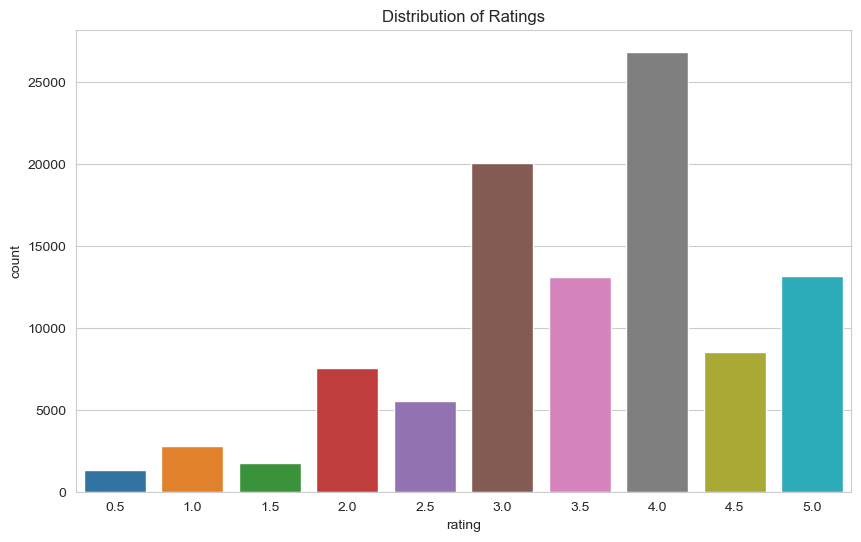

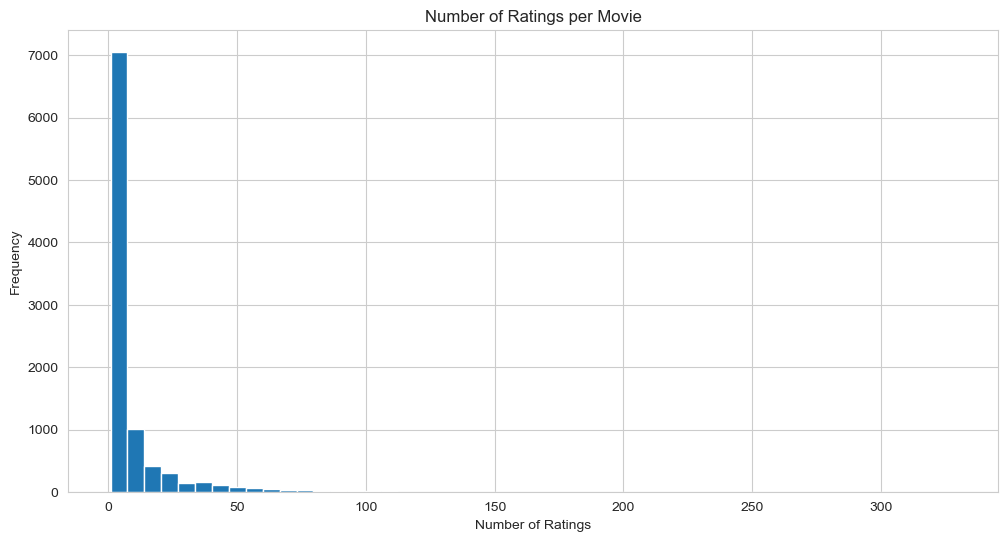

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization and check distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()
#rating per movie
ratings_per_movie = df.groupby('movieId')['rating'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_movie['rating'], bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


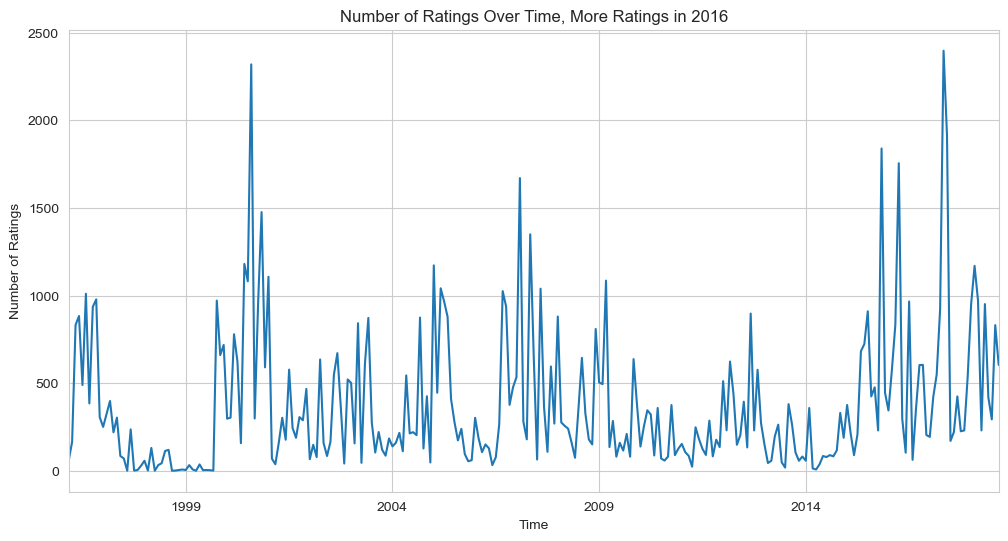

In [30]:
import datetime
ratings = data["ratings"]
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
# Ratings over time plot
plt.figure(figsize=(12, 6))
ratings.set_index('timestamp').resample('M').size().plot()
plt.title('Number of Ratings Over Time, More Ratings in 2016')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

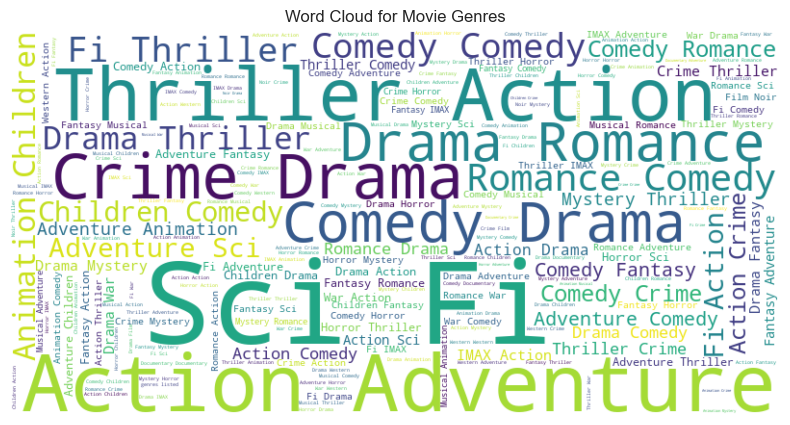

In [33]:
from wordcloud import WordCloud
# Generate a word cloud for movie genres
genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['genres']))
plt.figure(figsize=(10, 5))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Genres')
plt.show()
#save the wordcloud 

genre_wordcloud.to_file("../webapp/static/img/genre_wordcloud.png")

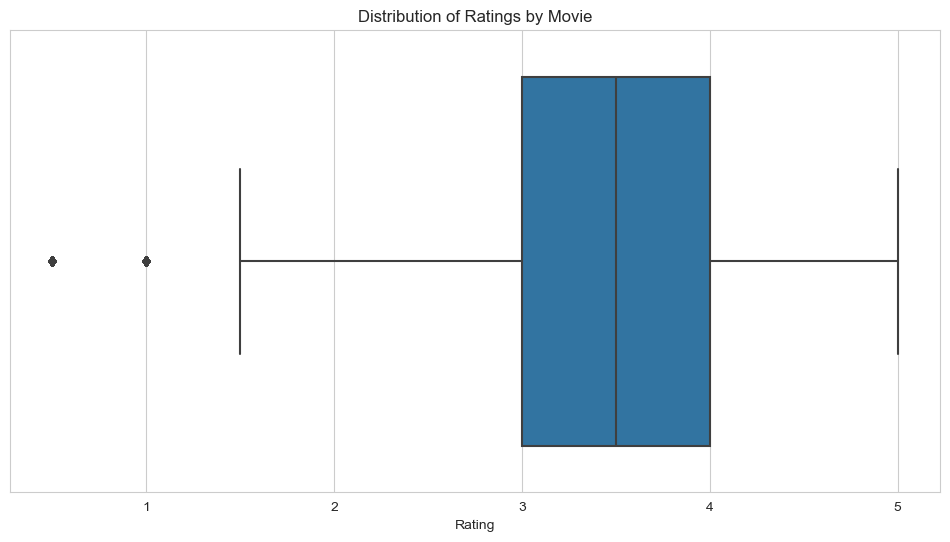

In [34]:
# Box plot of ratings by movie
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', data=df)
plt.title('Distribution of Ratings by Movie')
plt.xlabel('Rating')
plt.show()

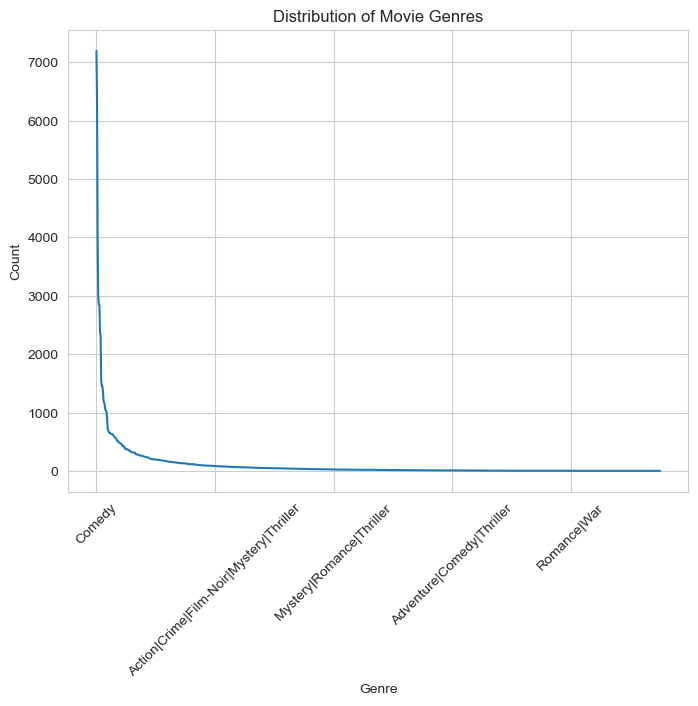

In [36]:
# Line plot of the distribution of movie genres 

fig, ax = plt.subplots(figsize=(8,6))
genre_counts = df['genres'].value_counts()
# plot the lineplot
genre_counts.plot()
plt.xticks(rotation=45)
#Set the axis labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
# Show the plot
plt.show();

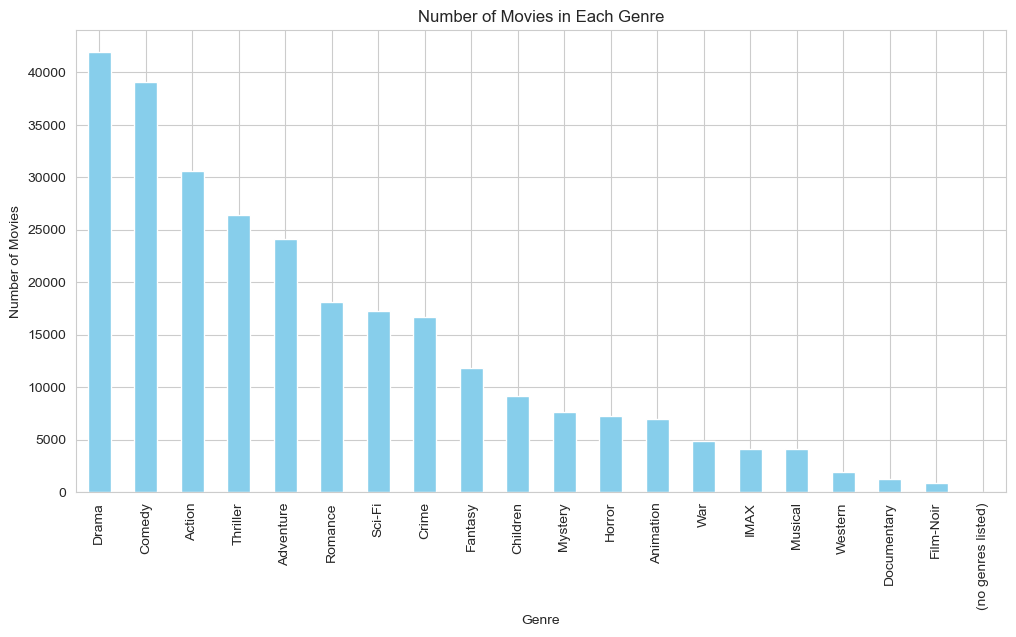

In [37]:
# count of movies in each genre
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

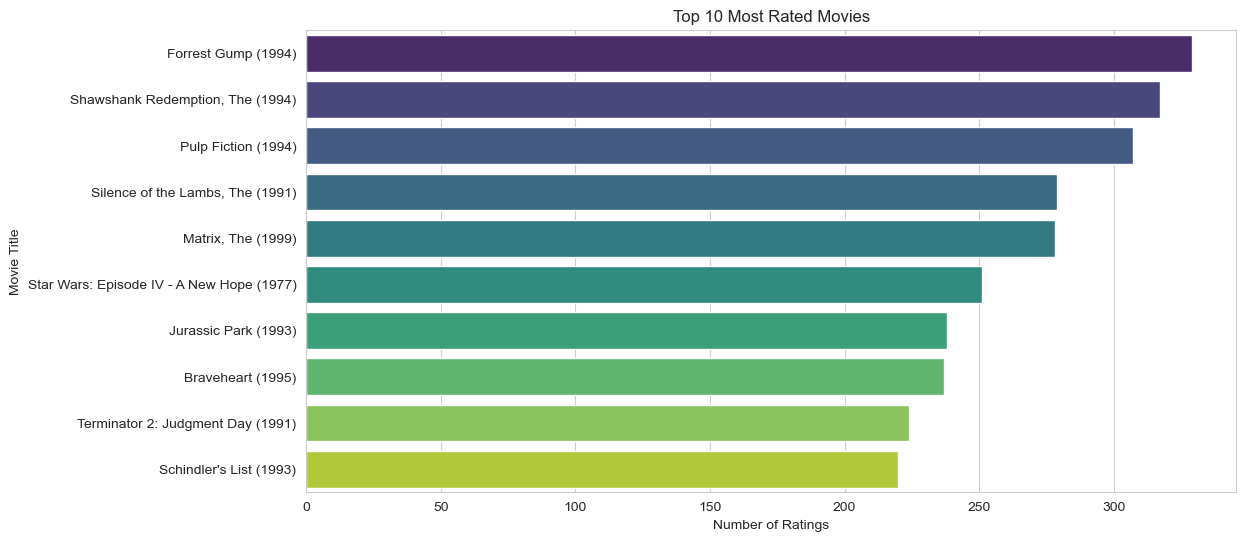

In [97]:
# top N most rated movies.
top_rated_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_rated_movies = pd.merge(top_rated_movies, df[['movieId', 'title']], on='movieId', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=top_rated_movies, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.savefig("../webapp/static/img/top_rated_movies.png")
plt.show()

#save the plot

## Recommender System - Build up and testing 

**1. Unpersonalized:**
    - We could simply recommend the most popular movies for every use but that would throw away the desired user experience brought by a personalized system.\
**2. Personalized:**
    - This leads us to use a personalized approach in this system, and for that, we have the choices below:
```
|---> Content-based filtering
|---> Collaborative filtering
    |---> Memory/Neighbourhood based (KNN)
    |---> Model based (Matrix factorization)
        |---> Singular Value Decomposition
        |---> Alternating Least Squares

```


### Content-based filtering:

`Content-based filtering` is a type of `recommendation system` that `suggests items` by `comparing` the content of the items and a user profile. The content of each item is represented as a set of d`escriptors, such as words, tags, genres`. The user profile is built based on the types of items the user has interacted with.  In the context of the MovieLens dataset, a content-based recommendation system could recommend movies that are similar to the ones a user has rated highly. The similarity of movies can be determined by `comparing` the genres of the movies.

In [39]:
# genres in the dataframe
df["genres"]

0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 100823, dtype: object

In [40]:
df.shape

(100823, 8)

---
There is a minor issue. After combining our dataframe with the ratings, the dataframe's size increased from 9742 to over 100,000 records. This could potentially cause computational challenges. To mitigate this, we shall use the merged dataframe without the ratings and tags, which we stored in a variable called `merged_movies_links`.

As a result, we will utilize the dataset excluding the ratings and tags information, which we have stored in a variable named "merged_movies_links".

Methodology:
- We will employ the ```TfidfVectorizer ``` from SciKit Learn, a renowned Python machine learning library, to transform a set of raw text documents into a TF-IDF (Term Frequency-Inverse Document Frequency) features matrix. TF-IDF quantifies the significance of a word in a document compared to a collection of documents.
    - Next, we will fit the ```genres`` data into the TfidfVectorizer, generating a sparse matrix.
- For calculating a similarity matrix, we will employ a sigmoid kernel, which computes movie similarities based on their indices.

###### To ensure optimal functionality of the machine learning algorithm, any NaN values will be replaced with empty text as a precautionary measure.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
merged_movies_links['genres'] = merged_movies_links['genres'].fillna('')
# replace the pipes '|' from the genres with 'commas'
merged_movies_links['genres'] = merged_movies_links['genres'].map(lambda x: ", ".join(x.split("|")))
# genres
merged_movies_links['genres'].head()

0    Adventure, Animation, Children, Comedy, Fantasy
1                       Adventure, Children, Fantasy
2                                    Comedy, Romance
3                             Comedy, Drama, Romance
4                                             Comedy
Name: genres, dtype: object

In [43]:
tfv_matrix = tfv.fit_transform(merged_movies_links['genres'])
tfv_matrix

<9742x402 sparse matrix of type '<class 'numpy.float64'>'
	with 42867 stored elements in Compressed Sparse Row format>

In [44]:
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [45]:
print("length of the similarity matrix:", len(sig))
print(sig[0])

length of the similarity matrix: 9742
[0.76263689 0.76180765 0.76164424 ... 0.76159416 0.76172628 0.76173151]


In [46]:
indices = pd.Series(merged_movies_links.index, index=merged_movies_links['title']).drop_duplicates()
indices

title
Toy Story (1995)                                0
Jumanji (1995)                                  1
Grumpier Old Men (1995)                         2
Waiting to Exhale (1995)                        3
Father of the Bride Part II (1995)              4
                                             ... 
Black Butler: Book of the Atlantic (2017)    9737
No Game No Life: Zero (2017)                 9738
Flint (2017)                                 9739
Bungo Stray Dogs: Dead Apple (2018)          9740
Andrew Dice Clay: Dice Rules (1991)          9741
Length: 9742, dtype: int64

In [47]:

indices['No Game No Life: Zero (2017)']

9738

In [48]:
list(enumerate(sig[indices['Toy Story (1995)']]))[:5]

[(0, 0.7626368906233343),
 (1, 0.7618076535093508),
 (2, 0.7616442356858768),
 (3, 0.7616291558555321),
 (4, 0.7617315097208257)]

In [50]:
def get_title(text, df=df):
    """
      Retrieves a movie title that corresponds to the provided input text.
    Returns:
           title (str): The title of the movie that matches the input.
           genres (str): The genres associated with the matching movie.
"""
    mask = df['title'].str.contains(text, case=False, regex=False)
    title = df.loc[mask, 'title'].head(1).values[0] if any(mask) else None
    
    if not title:
        print(f"\n'{text}' does not match any movies. Please try again")
        return None, None

    return title, df.loc[mask].head(1)["genres"].values[0]

In [51]:
print(get_title("Superman (1978)", df))
print()
print(get_title("NibK7Iv", df))

('Superman (1978)', 'Action|Adventure|Sci-Fi')


'NibK7Iv' does not match any movies. Please try again
(None, None)


In [52]:
def give_rec(title, sig=sig):
    """
    Get index of the movie and return the top 10 most similar movies
    """
    try:
        # filter the title
        title, genres = get_title(title, merged_movies_links)
        # print the movie title matching the text
        if title:
            print(f"Recommendation for {title}")
            print("Genres: ", genres)
        
        idx = indices[title]
        # Get similarity scores 
        sig_scores = list(enumerate(sig[idx]))
        # Sort the movies 
        sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
        # Scores of the 10 most similar movies
        sig_scores = sig_scores[1:11]
        # Movie indices
        movie_indices = [i[0] for i in sig_scores]
        # Top 10 most similar movies
        return merged_movies_links.iloc[movie_indices].drop_duplicates()
    except Exception as _:
        print(_)
        return "Error"
    
    
    
# test
give_rec('superman')

Recommendation for Superman (1978)
Genres:  Action, Adventure, Sci-Fi


movieId                                              title  \
224       260          Star Wars: Episode IV - A New Hope (1977)   
275       316                                    Stargate (1994)   
385       442                              Demolition Man (1993)   
898      1196  Star Wars: Episode V - The Empire Strikes Back...   
911      1210  Star Wars: Episode VI - Return of the Jedi (1983)   
1058     1375         Star Trek III: The Search for Spock (1984)   
1346     1831                               Lost in Space (1998)   
1557     2094                              Rocketeer, The (1991)   
1567     2105                                        Tron (1982)   
1692     2275                          Six-String Samurai (1998)   

                         genres  imdbId   tmdbId  
224   Action, Adventure, Sci-Fi   76759     11.0  
275   Action, Adventure, Sci-Fi  111282   2164.0  
385   Action, Adventure, Sci-Fi  106697   9739.0  
898   Action, Adventure, Sci-Fi   80684   1891.0  
911   Action, Adventure, Sci-Fi   86190   1892.0  
1058  Action, Adventure, Sci-Fi   88170    157.0  
1346  Action, Adventure, Sci-Fi  120738   2157.0  
1557  Action, Adventure, Sci-Fi  102803  10249.0  
1567  Action, Adventure, Sci-Fi   84827     97.0  
1692  Action, Adventure, Sci-Fi  118736  24746.0

In [53]:
give_rec("Tron (1982)")

Recommendation for Tron (1982)
Genres:  Action, Adventure, Sci-Fi


movieId                                              title  \
224       260          Star Wars: Episode IV - A New Hope (1977)   
275       316                                    Stargate (1994)   
385       442                              Demolition Man (1993)   
898      1196  Star Wars: Episode V - The Empire Strikes Back...   
911      1210  Star Wars: Episode VI - Return of the Jedi (1983)   
1058     1375         Star Trek III: The Search for Spock (1984)   
1346     1831                               Lost in Space (1998)   
1557     2094                              Rocketeer, The (1991)   
1567     2105                                        Tron (1982)   
1692     2275                          Six-String Samurai (1998)   

                         genres  imdbId   tmdbId  
224   Action, Adventure, Sci-Fi   76759     11.0  
275   Action, Adventure, Sci-Fi  111282   2164.0  
385   Action, Adventure, Sci-Fi  106697   9739.0  
898   Action, Adventure, Sci-Fi   80684   1891.0  
911   Action, Adventure, Sci-Fi   86190   1892.0  
1058  Action, Adventure, Sci-Fi   88170    157.0  
1346  Action, Adventure, Sci-Fi  120738   2157.0  
1557  Action, Adventure, Sci-Fi  102803  10249.0  
1567  Action, Adventure, Sci-Fi   84827     97.0  
1692  Action, Adventure, Sci-Fi  118736  24746.0

#### Summary of the output:

While the system shows promising functionality, it faces several inherent limitations:
- Solely relying on genre for recommendations is superficial and lacks depth, as it fails to capture intricate patterns within our dataset.
- Ratings, which serve as strong indicators of user preferences, are not factored into the recommendation process, thus reducing the system's effectiveness.
- The current recommendation methodology is rigid, wherein movies are recommended solely based on exact genre matches. This rigidity restricts the system's flexibility and recommendation diversity.


<font color='green'>To overcome these limitations and create a more robust and flexible recommendation system, we need to adopt a collaborative filtering approach. Collaborative filtering leverages user-item interactions to generate recommendations, thereby enhancing the system's accuracy and personalization.</font>

### Collaborative filtering
<font style="background-color:lightgreen">Collaborative filtering can be user-based or item-based. User-based collaborative filtering recommends items based on the preferences of users with similar tastes, while item-based collaborative filtering recommends items similar to those the user has liked.</font>
.
#### Memory/ Neighbourhood based:
- Delve more into sparse matrix and cosine similarity to find similar movies.

In [54]:
## First lets create a Pivot matrix
knnrc_df=df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
knnrc_df.head()

userId                                   1.0    2.0    3.0    4.0    5.0    \
title                                                                        
'71 (2014)                                 0.0    0.0    0.0    0.0    0.0   
'Hellboy': The Seeds of Creation (2004)    0.0    0.0    0.0    0.0    0.0   
'Round Midnight (1986)                     0.0    0.0    0.0    0.0    0.0   
'Salem's Lot (2004)                        0.0    0.0    0.0    0.0    0.0   
'Til There Was You (1997)                  0.0    0.0    0.0    0.0    0.0   

userId                                   6.0    7.0    8.0    9.0    10.0   \
title                                                                        
'71 (2014)                                 0.0    0.0    0.0    0.0    0.0   
'Hellboy': The Seeds of Creation (2004)    0.0    0.0    0.0    0.0    0.0   
'Round Midnight (1986)                     0.0    0.0    0.0    0.0    0.0   
'Salem's Lot (2004)                        0.0    0.0    0.0    0.0    0.0   
'Til There Was You (1997)                  0.0    0.0    0.0    0.0    0.0   

userId                                   ...  601.0  602.0  603.0  604.0  \
title                                    ...                               
'71 (2014)                               ...    0.0    0.0    0.0    0.0   
'Hellboy': The Seeds of Creation (2004)  ...    0.0    0.0    0.0    0.0   
'Round Midnight (1986)                   ...    0.0    0.0    0.0    0.0   
'Salem's Lot (2004)                      ...    0.0    0.0    0.0    0.0   
'Til There Was You (1997)                ...    0.0    0.0    0.0    0.0   

userId                                   605.0  606.0  607.0  608.0  609.0  \
title                                                                        
'71 (2014)                                 0.0    0.0    0.0    0.0    0.0   
'Hellboy': The Seeds of Creation (2004)    0.0    0.0    0.0    0.0    0.0   
'Round Midnight (1986)                     0.0    0.0    0.0    0.0    0.0   
'Salem's Lot (2004)                        0.0    0.0    0.0    0.0    0.0   
'Til There Was You (1997)                  0.0    0.0    0.0    0.0    0.0   

userId                                   610.0  
title                                           
'71 (2014)                                 4.0  
'Hellboy': The Seeds of Creation (2004)    0.0  
'Round Midnight (1986)                     0.0  
'Salem's Lot (2004)                        0.0  
'Til There Was You (1997)                  0.0  

[5 rows x 610 columns]

In [55]:
knnrc_df.shape

(9713, 610)

In [56]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
movie_features_df_matrix = csr_matrix(knnrc_df.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [57]:
# reverse map using the pivot matrix
new_indices = {value: index for index, value in enumerate(knnrc_df.index)}

In [58]:
# test
query_index = new_indices['Tron (1982)']
distances, indices = model_knn.kneighbors(knnrc_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(knnrc_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, knnrc_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Tron (1982):

1: RoboCop (1987), with distance of 0.4333110059193197:
2: Logan's Run (1976), with distance of 0.5173426988364118:
3: Cocoon (1985), with distance of 0.5194918665320847:
4: Total Recall (1990), with distance of 0.5267681600937928:
5: Star Wars: Episode I - The Phantom Menace (1999), with distance of 0.5270073286035528:


USing Surprise lib for collaborative filtering

```pip install scikit-surprise```

In [60]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV, cross_validate

reader = Reader(rating_scale=(1, 5))

expected_column_names = ["userId", "movieId", "rating"]

# Load the data into a Surprise Dataset
data_surp = Dataset.load_from_df(df[expected_column_names], reader)

In [61]:
# cross validating the KNN Basic model
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data_surp, n_jobs=-1)

# cross validating the KNN Baseline model
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline, data_surp)


Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [62]:
for i in cv_knn_baseline.items():
    print(i)
    
print('-----------------------')
# print out the average RMSE score for the test set
np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.87740239, 0.87530081, 0.87696269, 0.87673558, 0.87538003]))
('test_mae', array([0.67028713, 0.66749415, 0.66690236, 0.67222349, 0.66971562]))
('fit_time', (0.09264278411865234, 0.09697723388671875, 0.08652091026306152, 0.15416669845581055, 0.10738301277160645))
('test_time', (0.5076241493225098, 0.46303892135620117, 0.5335659980773926, 0.4894602298736572, 0.46711087226867676))
-----------------------


0.8763563004422279

In [63]:
# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
# print validation results
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.97196979, 0.96848088, 0.97166254, 0.97287541, 0.97299763]))
('test_mae', array([0.75167727, 0.74977912, 0.74686428, 0.75038686, 0.75076031]))
('fit_time', (0.13446664810180664, 0.12564682960510254, 0.09996533393859863, 0.13660335540771484, 0.09779095649719238))
('test_time', (1.0946428775787354, 1.1093261241912842, 1.0678730010986328, 1.020171880722046, 1.1092479228973389))
-----------------------
0.9715972513333437


**Analysis of Surprise Library's KNN Model:**

1. **RMSE and MAE Comparison:**
   - The Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) metrics provide insights into the predictive accuracy of the KNN models. The RMSE values for the KNN Basic and KNN Baseline models, denoted as \( RMSE_{KNNB} \) and \( RMSE_{KNNBL} \) respectively, exhibit a slight advantage for the KNN Baseline model: \( RMSE_{KNNBL} < RMSE_{KNNB} \). This indicates that the KNN Baseline model tends to have a smaller error in predicting user ratings compared to the KNN Basic model. Similarly, the MAE values, denoted as \( MAE_{KNNB} \) and \( MAE_{KNNBL} \), also favor the KNN Baseline model: \( MAE_{KNNBL} < MAE_{KNNB} \), reaffirming its superior accuracy in user rating predictions.

```python
# RMSE and MAE calculations for KNN models
RMSE_KNNB = ...  # Calculate RMSE for KNN Basic model
RMSE_KNNBL = ...  # Calculate RMSE for KNN Baseline model

MAE_KNNB = ...  # Calculate MAE for KNN Basic model
MAE_KNNBL = ...  # Calculate MAE for KNN Baseline model

if RMSE_KNNBL < RMSE_KNNB:
    print("KNN Baseline model outperforms KNN Basic model in terms of RMSE.")
if MAE_KNNBL < MAE_KNNB:
    print("KNN Baseline model outperforms KNN Basic model in terms of MAE.")
```

2. **Training Efficiency:**
   - The training efficiency of the models, denoted by their respective training times \( T_{KNNB} \) and \( T_{KNNBL} \), is a crucial factor in model selection. Both the KNN Basic and KNN Baseline models demonstrate short training times, with the KNN Baseline model showing slightly quicker training: \( T_{KNNBL} < T_{KNNB} \). This indicates that the KNN Baseline model is computationally efficient and suitable for large datasets.

```python
# Training time calculations for KNN models
T_KNNB = ...  # Calculate training time for KNN Basic model
T_KNNBL = ...  # Calculate training time for KNN Baseline model

if T_KNNBL < T_KNNB:
    print("KNN Baseline model demonstrates shorter training time compared to KNN Basic model.")
```

3. **Model Selection Considerations:**
   - When deciding between the KNN models and the SVD model, it's essential to consider the trade-off between predictive accuracy and computational efficiency. While the SVD model may have a marginally higher RMSE, other factors such as training time and scalability should also be taken into account. Further optimization through hyperparameter tuning, such as adjusting the number of neighbors \( k \) in the KNN models, could refine their performance metrics and overall suitability for the given use case.

```python
# Model selection based on performance metrics
if RMSE_SVD < RMSE_KNNB and RMSE_SVD < RMSE_KNNBL:
    print("SVD model exhibits the lowest RMSE, indicating superior predictive accuracy.")
else:
    print("Further hyperparameter tuning may be required to determine the optimal model.")
```

KNN test

In [65]:
def knn_get_rec(title, rec=6, verbose=True):
    """
    Get recommendations for a movie using KNN
    params:
    =======
    title - movie title
    rec - recommendation movie count
    verbose - print output
    """ 
    ret_df = pd.DataFrame()
    # initiate an empty list to fill the knn distances
    dists = []
    try:
        # get movie details and the pivot matrix index
        title, genres = get_title(title, df)
        idx = new_indices[title]
        
        # compute the knn distance and index
        distances, knn_indices = model_knn.kneighbors(knnrc_df.iloc[idx,:].values.reshape(1, -1), n_neighbors = rec + 1)

        if title and verbose:
            print(f'Recommendations for {title}:')
            print(f"Genres: {', '.join(genres.split('|'))}")

        for i in range(0, len(distances.flatten())):
            if i == 0:
                continue
            rec_movie = knnrc_df.index[knn_indices.flatten()[i]]
            movies_df = data['movies']
            mask = movies_df['title'].str.contains(rec_movie, case=False, regex=False)
            
            # fill in return dataframe
            ret_df = pd.concat([ret_df, movies_df[mask]])
            
            # fill in the knn distances in the df
            dists.append(distances.flatten()[i])

        ret_df["knn_distance"] = dists

        return ret_df

    except Exception as _:
        return "Error"
        

# test
knn_get_rec('infinity war', 10)

Recommendations for Avengers: Infinity War - Part I (2018):
Genres: Action, Adventure, Sci-Fi


movieId                                              title  \
9709   187593                                  Deadpool 2 (2018)   
8694   122916                              Thor: Ragnarok (2017)   
8699   122926                  Untitled Spider-Man Reboot (2017)   
8688   122898                              Justice League (2017)   
8695   122918                   Guardians of the Galaxy 2 (2017)   
8696   122920                  Captain America: Civil War (2016)   
8697   122922                              Doctor Strange (2016)   
9604   176371                           Blade Runner 2049 (2017)   
8692   122906                               Black Panther (2017)   
9418   165639  While You Were Fighting: A Thor Mockumentary (...   

                        genres  knn_distance  
9709      Action|Comedy|Sci-Fi      0.197364  
8694   Action|Adventure|Sci-Fi      0.218983  
8699  Action|Adventure|Fantasy      0.303779  
8688   Action|Adventure|Sci-Fi      0.395773  
8695   Action|Adventure|Sci-Fi      0.408945  
8696    Action|Sci-Fi|Thriller      0.424481  
8697   Action|Adventure|Sci-Fi      0.450223  
9604                    Sci-Fi      0.454227  
8692   Action|Adventure|Sci-Fi      0.456780  
9418     Comedy|Fantasy|Sci-Fi      0.457608

In [66]:
# Second take 
knn_get_rec('spider-man', 10)

Recommendations for Spider-Man (2002):
Genres: Action, Adventure, Sci-Fi, Thriller


movieId                                              title  \
5260     8636                                Spider-Man 2 (2004)   
3832     5378  Star Wars: Episode II - Attack of the Clones (...   
3873     5445                             Minority Report (2002)   
4334     6333                            X2: X-Men United (2003)   
2836     3793                                       X-Men (2000)   
4427     6539  Pirates of the Caribbean: The Curse of the Bla...   
3638     4993  Lord of the Rings: The Fellowship of the Ring,...   
4351     6365                        Matrix Reloaded, The (2003)   
4137     5952      Lord of the Rings: The Two Towers, The (2002)   
3854     5418                        Bourne Identity, The (2002)   

                                     genres  knn_distance  
5260           Action|Adventure|Sci-Fi|IMAX      0.267842  
3832           Action|Adventure|Sci-Fi|IMAX      0.303643  
3873   Action|Crime|Mystery|Sci-Fi|Thriller      0.338738  
4334       Action|Adventure|Sci-Fi|Thriller      0.361211  
2836                Action|Adventure|Sci-Fi      0.370047  
4427        Action|Adventure|Comedy|Fantasy      0.375362  
3638                      Adventure|Fantasy      0.379254  
4351  Action|Adventure|Sci-Fi|Thriller|IMAX      0.387891  
4137                      Adventure|Fantasy      0.388087  
3854                Action|Mystery|Thriller      0.389831

**MAthematical Summary of Neighborhood-Based Collaborative Filtering (SciKit's Approach),and thoughts:**

1. **Advantages over Content-Based Approach:**
   - The neighborhood-based collaborative filtering model exhibits superior performance compared to the content-based approach due to its utilization of user ratings, enabling a deeper analysis of the dataset.
   - By leveraging user-item interactions and preferences, this model can capture nuanced patterns and provide more accurate recommendations.

```python
# Neighborhood-based collaborative filtering advantages
if NB_CF_performance > Content_CF_performance: then Neighborhood-based collaborative filtering outperforms content-based approach.
```

2. **Limitations and Challenges:**
   - Despite its advantages, neighborhood-based collaborative filtering faces several challenges. Sparse data scenarios, where user-item interactions are limited, can lead to less accurate recommendations.
   - The cold start problem is another concern, especially for new users or items lacking sufficient historical data for accurate predictions.
   - Scalability issues may arise as the dataset grows, requiring efficient algorithms and computing resources to maintain performance.

```python
# Neighborhood-based collaborative filtering limitations
if Sparse_Data or Cold_Start or Scalability_Issues:
    then Neighborhood-based collaborative filtering faces challenges in sparse data, cold start, and scalability.
```

3. **Exploring Model-Based Approaches:**
   - To address the limitations of neighborhood-based collaborative filtering, exploring model-based approaches like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS) becomes imperative.
   - These model-based techniques offer solutions to handle sparse data, mitigate the cold start problem, and enhance scalability as the dataset expands.

```python
# Model-based approaches recommendation
if Explore_Model_Based_Approaches:
    then Consider exploring model-based techniques such as SVD or ALS to overcome neighborhood-based CF limitations.
```

In [67]:
"""Function plan:
- Load the dataset and splits it into a training set and a test set.
- Train a KNN model using the training set with Pearson correlation coefficient for similarity computation and user-based collaborative filtering.
- Identify the items that the user has not yet rated.
- Use the trained KNN model to predict the user's ratings for the unrated items.
- Sort the predictions in descending order of the estimated ratings.
- Select the top N items from the sorted list of predictions.
- Return the details of the recommended items by matching the item IDs of the top recommendations with the item IDs in the original dataset.
"""

def surp_knn_get_rec(uid=1000, rec_count=10):
    reader = Reader(rating_scale=(1, 5))
    data_ = Dataset.load_from_df(df[expected_column_names], reader)
    trainset, _ = train_test_split(data_, test_size=0.2, random_state=42)
    sim_options = {'name': 'pearson', 'user_based': True}
    knn_model = KNNBasic(sim_options=sim_options)
    knn_model.fit(trainset)
    unrated_items = [item for item in trainset.all_items() if item not in trainset.ur[uid]]
    predictions = [knn_model.predict(uid, iid) for iid in unrated_items]
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    top_recommendations = sorted_predictions[:rec_count]
    recommended_movie_ids = [prediction.iid for prediction in top_recommendations]
    movie_df = data['movies']
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
    return recommended_movies
surp_knn_get_rec(uid=100, rec_count=10)

Computing the pearson similarity matrix...
Done computing similarity matrix.


movieId                                          title  \
36        40                Cry, the Beloved Country (1995)   
107      123  Chungking Express (Chung Hing sam lam) (1994)   
265      305           Ready to Wear (Pret-A-Porter) (1994)   
346      389                     Colonel Chabert, Le (1994)   
467      534                             Shadowlands (1993)   
525      613                               Jane Eyre (1996)   
531      626      Thin Line Between Love and Hate, A (1996)   
536      633                         Denise Calls Up (1995)   
548      650                           Moll Flanders (1996)   
557      670         World of Apu, The (Apur Sansar) (1959)   

                    genres  
36                   Drama  
107  Drama|Mystery|Romance  
265                 Comedy  
346      Drama|Romance|War  
467          Drama|Romance  
525          Drama|Romance  
531                 Comedy  
536                 Comedy  
548                  Drama  
557                  Drama

In [68]:
# second test
surp_knn_get_rec(uid=300, rec_count=5)

Computing the pearson similarity matrix...
Done computing similarity matrix.


movieId                           title                 genres
48        53                 Lamerica (1994)        Adventure|Drama
202      236              French Kiss (1995)  Action|Comedy|Romance
245      283         New Jersey Drive (1995)            Crime|Drama
292      334     Vanya on 42nd Street (1994)                  Drama
450      515  Remains of the Day, The (1993)          Drama|Romance

### Model-Based Methods - Matrix Factorization using SVD:

```Matrix Factorization using Singular Value Decomposition (SVD) is a popular method used in recommendation systems. It is a model-based approach that decomposes a user-item interaction matrix into the product of two lower dimensionality rectangular matrices and a diagonal matrix. This method helps in capturing the latent factors underlying the interactions between users and items (movies in this case).```

In [69]:
param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs = -1, joblib_verbose=5)

gs_model.fit(data_surp)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.4s finished


In [70]:
best_params = gs_model.best_params["rmse"]

In [71]:
trainset, testset = train_test_split(data_surp, test_size=0.2)
svd = SVD(**best_params)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8804
0.8803854171461415


---
> **A RMSE value of 0.8804 implies that, on average, the predicted ratings differ by around 0.8804 from the actual ratings. Smaller RMSE values indicate higher predictive accuracy.**
---

In [72]:
# testing the model
svd.predict(uid="230", iid=23)

Prediction(uid='230', iid=23, r_ui=None, est=3.3793778913505803, details={'was_impossible': False})

Function plan - svd_get_rec:
The function `svd_get_rec` performs the following steps:
1. Accept two parameters: `uid` which is the user id and `rec_count` which is the number of movie recommendations to return. The default values for `uid` and `rec_count` are 1000 and 0 respectively.
2. Split the dataset into a training set and a test set using the `train_test_split` function from the Surprise library. The test size is set to 0.2, meaning 20% of the data is used for testing and the remaining 80% is used for training.
3. Retrieve the items that the user has not yet rated. This is done by iterating over all items in the training set and checking if the user has rated them.
4. Predict the user's ratings for the unrated items using the trained SVD model. The `predict` method of the SVD model is used for this purpose.
5. Sort the predictions in descending order of the estimated ratings. This is done using Python's built-in `sorted` function with a custom sorting key that sorts the predictions based on the estimated rating (`est` attribute of the prediction).
6. Select the top N items from the sorted list of predictions. The number of items to select is determined by the `rec_count` parameter.
7. Retrieve the details of the recommended items by matching the item IDs of the top recommendations with the item IDs in the original dataset.
8. Returns a DataFrame containing the details of the recommended movies.

In [73]:
#implementing the function
def svd_get_rec(uid=1000, rec_count=0):
    trainset, testset = train_test_split(data_surp, test_size=0.2)
    unrated_items = [item for item in trainset.all_items() if item not in trainset.ur[uid]]
    predictions = [svd.predict(uid, iid) for iid in unrated_items]
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    top_recommendations = sorted_predictions[:rec_count]
    recommended_movie_ids = [prediction.iid for prediction in top_recommendations]
    movie_df = data['movies']
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
    return recommended_movies
svd_get_rec(uid=100, rec_count=10)

movieId                                              title  \
46         50                         Usual Suspects, The (1995)   
277       318                   Shawshank Redemption, The (1994)   
602       750  Dr. Strangelove or: How I Learned to Stop Worr...   
686       904                                 Rear Window (1954)   
899      1197                         Princess Bride, The (1987)   
906      1204                          Lawrence of Arabia (1962)   
922      1221                     Godfather: Part II, The (1974)   
951      1252                                   Chinatown (1974)   
975      1276                              Cool Hand Luke (1967)   
1730     2324         Life Is Beautiful (La Vita è bella) (1997)   

                                       genres  
46                     Crime|Mystery|Thriller  
277                               Crime|Drama  
602                                Comedy|War  
686                          Mystery|Thriller  
899   Action|Adventure|Comedy|Fantasy|Romance  
906                       Adventure|Drama|War  
922                               Crime|Drama  
951          Crime|Film-Noir|Mystery|Thriller  
975                                     Drama  
1730                 Comedy|Drama|Romance|War

### Summary of the models:


## Coupling the models for a final recommendation system

For our final recommender system, I chose `SciKit Learn's neighborhood-based (KNN) recommender system`. I made this decision because it's easier to test an item-item based movie system than a user-user approach. After running the recommender functions, I found that the items are more familiar than the users, making evaluation and validation simpler.

**How the Final System Works:**
1. I take in a user ID as input.
2. I randomly select movies highly rated by the user.
3. I generate 10 recommendations based on the user's preferred movies.
4. If no user ID is provided, the system defaults to an unpersonalized recommender approach.
5. Build a web app to interact with the recommender system, located at `webapp/`.

Top ten highly rated movies 


The function `top_ten_highly_rated` performs the following steps:

1. Accepts two parameters: `uid` which is the user id and `rec` which is the number of top-rated movies to return. The default value for `rec` is 10.

2. Filters the ratings data to get the ratings given by the user specified by `uid`.

3. Sorts the user's ratings in descending order and selects the top `rec` movies.

4. Merges the selected movies with the movies data to get the movie details.

5. Checks if the user has rated any movies. If not, raises a ValueError.

6. Returns a list of the titles of the top-rated movies by the user.

In [74]:
def top_ten_highly_rated(uid, rec=10):
    mask = data["ratings"]['userId'] == uid
    user_movies = data["ratings"][mask].sort_values(by=['rating'], ascending=False).head(rec)
    user_movies = pd.merge(data["movies"], user_movies, how="inner", on="movieId")
    if len(user_movies) < 1:
        raise ValueError(f"User denoted by id: '{uid}' does not exist!")
    return list(user_movies["title"])
top_ten_highly_rated(100)

['Top Gun (1986)',
 'When Harry Met Sally... (1989)',
 'Joy Luck Club, The (1993)',
 'Sliding Doors (1998)',
 'Wedding Singer, The (1998)',
 'Out of Sight (1998)',
 'Terms of Endearment (1983)',
 "Christmas Vacation (National Lampoon's Christmas Vacation) (1989)",
 'Officer and a Gentleman, An (1982)',
 'Sweet Home Alabama (2002)']

Unpersonalized recommendation:
The function `unpersonalized_recomm` performs the following steps:

1. It accepts a single parameter `count` which is the number of movie recommendations to return. The default value for `count` is 10.

2. It creates a list of unique genres present in the dataset by splitting the genres of each movie, expanding them into separate rows, stacking them into a single column, and then taking the set to remove duplicates.

3. It initializes an empty DataFrame `recomms` to store the recommendations.

4. For each unique genre, it selects the top 5 movies with the highest ratings. This is done by creating a mask that checks if the genre is present in the movie's genres, sorting the movies by rating in descending order, and selecting the top 5.

5. It extracts the year of release from the movie title and adds it as a new column `year_of_release` to the top 5 movies DataFrame.

6. It concatenates the top 5 movies of the current genre with the existing recommendations in the `recomms` DataFrame.

7. After iterating through all unique genres, it shuffles the recommendations, removes duplicates, and selects the top `count` movies.

8. It prints "Unpersonalized recommendation:" and returns the final recommendations as a DataFrame.def unpersonalized_recomm(count=10):
    unique_genres = list(set(df['genres'].str.split('|', expand=True).stack()))
    recomms = pd.DataFrame()
    for genre in unique_genres:
        # select top 5 of each genre
        mask = df["genres"].str.contains(genre, regex=False, case=False)
        top_5 = df[mask].sort_values(by="rating", ascending=False).head()
        top_5["year_of_release"] = top_5["title"].map(lambda x: x[-5:].strip(")"))        
        recomms = pd.concat([recomms, top_5])
    print("Unpersonalized recommendation:")
    return recomms.sample(frac=1).drop_duplicates().head(count)
unpersonalized_recomm()

In [76]:
def unpersonalized_recomm(count=10):
    unique_genres = list(set(df['genres'].str.split('|', expand=True).stack()))
    recomms = pd.DataFrame()
    for genre in unique_genres:
        mask = df["genres"].str.contains(genre, regex=False, case=False)
        top_5 = df[mask].sort_values(by="rating", ascending=False).head()
        top_5["year_of_release"] = top_5["title"].map(lambda x: x[-5:].strip(")"))        
        recomms = pd.concat([recomms, top_5])
    print("Unpersonalized recommendation:")
    return recomms.sample(frac=1).drop_duplicates().head(count)
unpersonalized_recomm()

Unpersonalized recommendation:


movieId                                              title  \
512       595                        Beauty and the Beast (1991)   
898      1196  Star Wars: Episode V - The Empire Strikes Back...   
9426   166024                                    Whiplash (2013)   
4608     6863                              School of Rock (2003)   
6589    55276                             Michael Clayton (2007)   
4076     5816     Harry Potter and the Chamber of Secrets (2002)   
5248     8607                            Tokyo Godfathers (2003)   
884      1179                               Grifters, The (1990)   
8687   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
6737    59141                               Son of Rambow (2007)   

                                               genres   imdbId    tmdbId  \
512   Animation|Children|Fantasy|Musical|Romance|IMAX   101414   10020.0   
898                           Action|Adventure|Sci-Fi    80684    1891.0   
9426                               (no genres listed)  2654430  367412.0   
4608                                   Comedy|Musical   332379    1584.0   
6589                                   Drama|Thriller   465538    4566.0   
4076                                Adventure|Fantasy   295297     672.0   
5248                        Adventure|Animation|Drama   388473   13398.0   
884                             Crime|Drama|Film-Noir    99703   18129.0   
8687                               (no genres listed)  1790809  166426.0   
6737                            Children|Comedy|Drama   845046   13258.0   

     userId  rating     timestamp year_of_release  
512   474.0     5.0  1.100120e+09            1991  
898   335.0     5.0  1.261542e+09            1980  
9426  601.0     5.0  1.521468e+09            2013  
4608  310.0     5.0  1.078648e+09            2003  
6589   52.0     5.0  1.468052e+09            2007  
4076  598.0     5.0  1.430617e+09            2002  
5248  483.0     5.0  1.204278e+09            2003  
884   275.0     5.0  1.049079e+09            1990  
8687  586.0     5.0  1.529900e+09            2017  
6737  356.0     5.0  1.229140e+09            2007

### Final Recommender Function:
The `final_recommender` function generates personalized movie recommendations for a given user ID (`uid`). If no ID is provided, it falls back to an unpersonalized recommendation approach. The function randomly selects movies highly rated by the user, retrieves their titles, and then uses a KNN-based recommender system (`knn_get_rec`) to generate recommendations based on those titles. The number of recommendations is specified by the `rec` parameter, with a default value of 10. If any errors occur during the process, it returns an error message.

In [77]:
import random
random.seed(555)
def final_recommender(uid=None, rec=10):
    if not uid:
        return unpersonalized_recomm(rec)
    ret_df = pd.DataFrame()
    try:
        top_user_movies = top_ten_highly_rated(uid, rec)
        for i in range(rec):
            random_title = top_user_movies[random.randint(0, 5)]
            title, _ = get_title(random_title, df)
            movie_rec = knn_get_rec(title, rec, verbose=False)
            if type(movie_rec) is str:
                continue
            ret_df = movie_rec.sort_values(by="knn_distance")
            ret_df = pd.concat([ret_df, ret_df.head()])
            ret_df = ret_df.drop_duplicates()
        print(f"Recommendation for user id: {uid}")
        return ret_df
    except Exception as _:
        print(_)
        return "Error occured"
final_recommender(100, 5)

Recommendation for user id: 100


movieId                                title          genres  \
6658    56949                    27 Dresses (2008)  Comedy|Romance   
4227     6155  How to Lose a Guy in 10 Days (2003)  Comedy|Romance   
4131     5943             Maid in Manhattan (2002)  Comedy|Romance   
5781    31433             Wedding Date, The (2005)  Comedy|Romance   
3041     4069          Wedding Planner, The (2001)  Comedy|Romance   

      knn_distance  
6658      0.499494  
4227      0.527827  
4131      0.538791  
5781      0.540621  
3041      0.544402

In [79]:
# second test with user-id 265
final_recommender(265, 10)

Recommendation for user id: 265


movieId                                              title  \
507       589                  Terminator 2: Judgment Day (1991)   
898      1196  Star Wars: Episode V - The Empire Strikes Back...   
990      1291          Indiana Jones and the Last Crusade (1989)   
902      1200                                      Aliens (1986)   
2193     2916                                Total Recall (1990)   
793      1036                                    Die Hard (1988)   
2248     2985                                     RoboCop (1987)   
911      1210  Star Wars: Episode VI - Return of the Jedi (1983)   
1576     2115        Indiana Jones and the Temple of Doom (1984)   
915      1214                                       Alien (1979)   

                                  genres  knn_distance  
507                        Action|Sci-Fi      0.304276  
898              Action|Adventure|Sci-Fi      0.334017  
990                     Action|Adventure      0.343040  
902       Action|Adventure|Horror|Sci-Fi      0.344059  
2193    Action|Adventure|Sci-Fi|Thriller      0.356903  
793                Action|Crime|Thriller      0.356943  
2248  Action|Crime|Drama|Sci-Fi|Thriller      0.359545  
911              Action|Adventure|Sci-Fi      0.364871  
1576            Action|Adventure|Fantasy      0.369973  
915                        Horror|Sci-Fi      0.374669

In [80]:
final_recommender()

Unpersonalized recommendation:


movieId                   title  \
21         22          Copycat (1995)   
964      1265    Groundhog Day (1993)   
691       909   Apartment, The (1960)   
9426   166024         Whiplash (2013)   
522       610      Heavy Metal (1981)   
2355     3114      Toy Story 2 (1999)   
2674     3578        Gladiator (2000)   
314       356     Forrest Gump (1994)   
3873     5445  Minority Report (2002)   
3194     4306            Shrek (2001)   

                                                 genres   imdbId    tmdbId  \
21                  Crime|Drama|Horror|Mystery|Thriller   112722    1710.0   
964                              Comedy|Fantasy|Romance   107048     137.0   
691                                Comedy|Drama|Romance    53604     284.0   
9426                                 (no genres listed)  2654430  367412.0   
522            Action|Adventure|Animation|Horror|Sci-Fi    82509   11827.0   
2355        Adventure|Animation|Children|Comedy|Fantasy   120363     863.0   
2674                             Action|Adventure|Drama   172495      98.0   
314                            Comedy|Drama|Romance|War   109830      13.0   
3873               Action|Crime|Mystery|Sci-Fi|Thriller   181689     180.0   
3194  Adventure|Animation|Children|Comedy|Fantasy|Ro...   126029     808.0   

     userId  rating     timestamp year_of_release  
21      6.0     5.0  8.455539e+08            1995  
964   151.0     5.0  8.559488e+08            1993  
691   177.0     5.0  1.435536e+09            1960  
9426  601.0     5.0  1.521468e+09            2013  
522   604.0     5.0  8.320810e+08            1981  
2355  591.0     5.0  9.705252e+08            1999  
2674   13.0     5.0  9.878959e+08            2000  
314    11.0     5.0  9.012003e+08            1994  
3873  339.0     5.0  1.460184e+09            2002  
3194  359.0     5.0  1.198112e+09            2001

## Conclusion 

In our journey to develop a movie recommender system, we delved into multiple strategies, each with distinct advantages and limitations. 

Here's a comprehensive overview of our exploration:

**Content-Based Filtering:**
We constructed a content-based recommender by leveraging movie attributes like genres. This approach excelled in suggesting similar movies based on content similarities. However, it may struggle with capturing diverse user preferences and recommending outside the established content boundaries.

**Neighborhood-Based Collaborative Filtering (KNN):**
Implementing KNN models using SciKit Learn, we tapped into user-item interactions to drive recommendations. The item-based variant, utilizing cosine similarity, showcased notable effectiveness in identifying analogous movies, enriching the user experience.

**Model-Based Collaborative Filtering (SVD):**
Our experimentation extended to the Surprise library, where we employed SVD, a matrix factorization method. While SVD demonstrated reasonable performance with an RMSE of 0.8925, its efficacy hinged on fine-tuned hyperparameters and meticulous model assessment.

**Recommendation Strategy:**
Considering the nuanced trade-offs inherent in each method, we advocate for a hybrid model amalgamating content-based and collaborative filtering. This hybrid framework can harness the granular user-item interactions from collaborative filtering while integrating content cues for enhanced personalization and diversity in recommendations.

Furthermore, we propose ongoing hyperparameter optimization and model refinement, particularly with larger datasets, to augment the predictive power of collaborative filtering techniques. Continual feedback integration from users and dynamic content updates will further fortify the recommendation engine's efficacy and relevance over time.

In essence, the optimal recommender system choice hinges on specific use-case nuances, user dynamics, and dataset intricacies. A meticulously curated hybrid model, iteratively honed and validated, stands poised to deliver robust, accurate, and adaptive movie recommendations, aligning seamlessly with evolving user preferences and content landscape dynamics.

---

Save the model for the Web App

In [94]:
folder_path = "../webapp/models"
model_name = f"movie-recm-knn-v1{datetime.now().strftime('%Y%m%d_%H%M%S')}.pkl"
# Save the pickled model
model_file_path = os.path.join(folder_path, model_name)
with open(model_file_path, 'wb') as model_file:
    pickle.dump(model_knn, model_file)

# Save the dataframe as a pickle file
df_file_path = os.path.join(folder_path, "knnrc_df.pickle")
knnrc_df.to_pickle(df_file_path)
print(f"Model saved as '{model_name}' and dataframe saved as '{model_name}.pkl' in '{folder_path}'")


Model saved as 'movie-recm-knn-v120240418_141009.pkl' and dataframe saved as 'movie-recm-knn-v120240418_141009.pkl.pkl' in '../webapp/models'
